In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-movies-and-tv-shows/Netflix_movies_and_tv_shows_clustering.csv
/kaggle/input/netflix-dataset/netflix_titles.csv


In [4]:
#create the years and durations lists

years = [i for i in range(2011, 2021)]
durations= [103, 101, 99, 100,100,95,95,96,93,90]


# Create a dictionary with two list
movie_dict = {'years':years, 'durations':durations}

#Print the dict 
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

In [5]:
##### Create the dataframe from the dictionary
import pandas as pd
durations_df = pd.DataFrame(movie_dict)
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


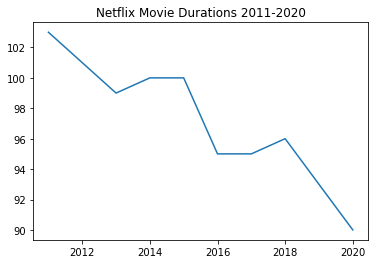

In [6]:
import matplotlib.pyplot as plt
plt.plot(durations_df['years'], durations_df['durations'])
plt.title('Netflix Movie Durations 2011-2020')
plt.show()


### ????? plot the data from list and it is not from real dataset

In [7]:
# Create a dataframe from real data set

netflix_df = pd.read_csv('/kaggle/input/netflix-dataset/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [90]:
netflix_df_movies_only = pd.DataFrame(netflix_df[netflix_df['type']=='Movie'])
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'release_year','duration']]
netflix_movies_col_subset[['duration','min']]=netflix_movies_col_subset['duration'].str.split(' ', expand = True)
del netflix_movies_col_subset['min']
netflix_movies_col_subset['duration']=pd.to_numeric(netflix_movies_col_subset['duration'])
print(netflix_movies_col_subset.dtypes)
netflix_movies_col_subset.head()

title            object
country          object
release_year      int64
duration        float64
dtype: object


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,title,country,release_year,duration
0,Dick Johnson Is Dead,United States,2020,90.0
6,My Little Pony: A New Generation,NaN,2021,91.0
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125.0
9,The Starling,United States,2021,104.0
12,Je Suis Karl,"Germany, Czech Republic",2021,127.0


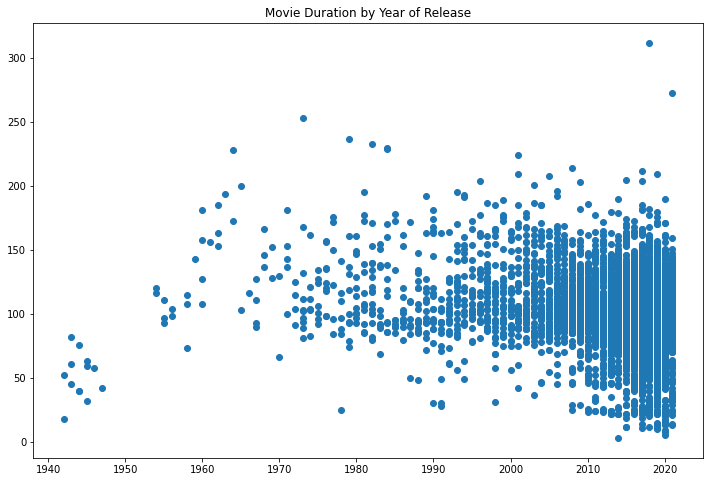

In [91]:
fig = plt.figure(figsize=(12,8))
# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'])

# Create a title
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()

In [ ]:
Are we cetain that movies are getting shorter? 

No 

### Compare to the 1940 to 2020, more movies were produced years by years